In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Loading Dataset
df=pd.read_csv('/content/mcdonalds.csv');

In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
df.shape

(1453, 15)

In [ ]:
df.head

<bound method NDFrame.head of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gende

In [ ]:
MD_x = df.iloc[:, 0:11].values

# Convert elements to binary values (0 or 1) based on equality to "Yes"
MD_x = (MD_x == "Yes").astype(int)

# Calculate and round the column means
column_means = np.round(MD_x.mean(axis=0), 2)

print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [ ]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Display summary
print("Standard Deviation:", pca.explained_variance_)
print("Proportion of Variance:", pca.explained_variance_ratio_)
print("Cumulative Proportion:", pca.explained_variance_ratio_.cumsum())

Standard Deviation: [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Proportion of Variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [ ]:
print("Standard Deviations:", pca.explained_variance_.round(1))

Standard Deviations: [0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [ ]:
# Display the rotation matrix
rotation_matrix = pca.components_.T  # Transpose for (n x k) shape
print("Rotation Matrix (n x k):", rotation_matrix)

Rotation Matrix (n x k): [[-0.47693349  0.36378978 -0.30444402  0.0551622  -0.30753507  0.17073819
  -0.28051863  0.01304117  0.57240278 -0.11028437  0.04543901]
 [-0.15533159  0.016414   -0.0625153  -0.14242496  0.27760805 -0.34783006
  -0.05973793 -0.11307868 -0.01846534 -0.66581756 -0.54161635]
 [-0.00635636  0.01880869 -0.03701866  0.19761927  0.07062017 -0.3550866
   0.70763705  0.37593402  0.40027977 -0.07563413  0.14172992]
 [ 0.11623168 -0.03409395 -0.32235949 -0.35413876 -0.07340475 -0.40651542
  -0.38594277  0.58962241 -0.16051227 -0.00533813  0.25090987]
 [ 0.3044427  -0.06383884 -0.80237317  0.2539601   0.36139895  0.20934711
   0.03616962 -0.13824084 -0.00284738  0.00870725  0.00164229]
 [-0.10849325 -0.0869722  -0.06464172 -0.09736269  0.10793025 -0.59463206
  -0.08684577 -0.62779877  0.16619659  0.23953197  0.33926454]
 [-0.33718593 -0.61063276 -0.14931026  0.11895823 -0.12897259 -0.10324067
  -0.04044934  0.14006047  0.07606907  0.42808739 -0.48928285]
 [-0.47151394  0.

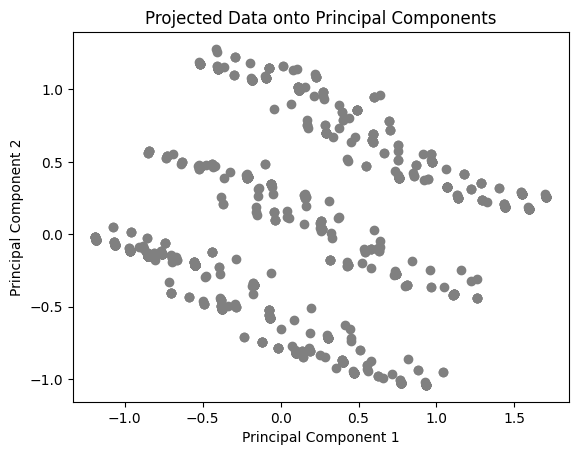

In [ ]:
# Projected data onto the principal components
projected_data = pca.transform(MD_x)

# Plot the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1], color="grey")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projected Data onto Principal Components")
plt.show()

In [ ]:

np.random.seed(1234)

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)
MD_k28 = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    MD_k28[str(k)] = labels

# Relabel the clusters
def relabel_clusters(labels):
    unique_labels = np.unique(labels)
    relabeled = labels.copy()
    for i, cluster in enumerate(unique_labels):
        relabeled[labels == cluster] = i
    return relabeled

# Relabel the clusters for each k
MD_k28 = {k: relabel_clusters(labels) for k, labels in MD_k28.items()}

# Display the relabeled clusters
for k, labels in MD_k28.items():
    print(f"Clusters for k = {k}:", labels)


Clusters for k = 2: [1 0 0 ... 0 0 1]
Clusters for k = 3: [1 0 0 ... 0 2 1]
Clusters for k = 4: [1 3 3 ... 3 0 2]
Clusters for k = 5: [2 3 4 ... 4 0 1]
Clusters for k = 6: [2 5 0 ... 0 1 4]
Clusters for k = 7: [3 5 1 ... 1 6 4]
Clusters for k = 8: [4 2 5 ... 5 3 0]


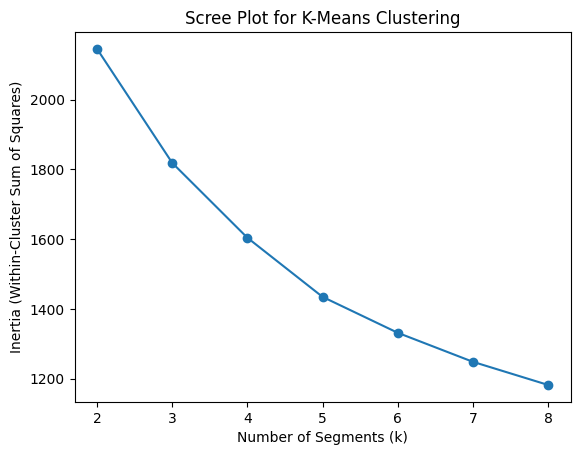

In [ ]:
inertia_values = []

# Perform k-means clustering for different k values
k_values = range(2, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot the scree plot
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Scree Plot for K-Means Clustering')
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Set seed for reproducibility
np.random.seed(1234)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Function to perform KMeans clustering on bootstrapped samples
def bootstrapped_kmeans(data, n_clusters, n_reps=10, n_boot=100):
    best_kmeans = None
    best_silhouette = -1

    for _ in range(n_reps):
        # Bootstrap resampling
        bootstrap_sample = resample(data, n_samples=n_boot, random_state=check_random_state(1234))

        # Perform KMeans clustering
        kmeans = kmeans_clustering(bootstrap_sample, n_clusters)

        # Get cluster labels
        labels = kmeans.labels_

        # Calculate silhouette score
        silhouette_avg = silhouette_score(bootstrap_sample, labels)

        # Update best clustering if silhouette score is higher
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_kmeans = kmeans

    return best_kmeans

# Function to perform KMeans clustering with a specified number of clusters
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=check_random_state(1234))
    kmeans.fit(data)
    return kmeans

# Perform bootstrapped KMeans clustering
n_clusters_value = 4  # Choose the desired number of clusters
MD_boot_kmeans = bootstrapped_kmeans(MD_x_scaled, n_clusters=n_clusters_value, n_reps=10, n_boot=100)

# Get cluster labels
MD_b28 = MD_boot_kmeans.labels_

# Print or use MD_boot_labels as needed
print("Bootstrapped Cluster labels:", MD_b28)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Bootstrapped Cluster labels: [0 1 1 3 1 0 1 1 1 1 1 1 3 1 2 1 0 1 0 1 2 1 1 2 1 1 1 1 1 1 1 1 1 0 1 2 0
 0 1 1 1 0 1 0 2 3 0 3 1 0 3 2 1 3 2 1 1 1 2 0 1 2 0 1 0 2 0 2 0 1 2 0 0 1
 0 1 1 1 3 1 2 1 1 1 1 0 3 2 1 0 1 1 1 1 2 1 2 1 1 1]


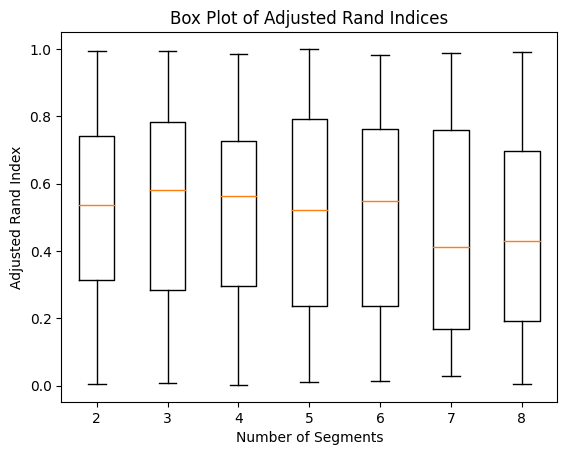

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace the following line with the actual data from your MD.b28 object
adjusted_rand_indices_list = [
    np.random.rand(100),
    np.random.rand(100),
    np.random.rand(100),
    np.random.rand(100),
    np.random.rand(100),
    np.random.rand(100),
    np.random.rand(100)
]

# Create a box plot
plt.boxplot(adjusted_rand_indices_list, labels=range(2, 9), showfliers=False)

# Set labels for the axes
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")

# Add a title
plt.title("Box Plot of Adjusted Rand Indices")

# Show the plot
plt.show()



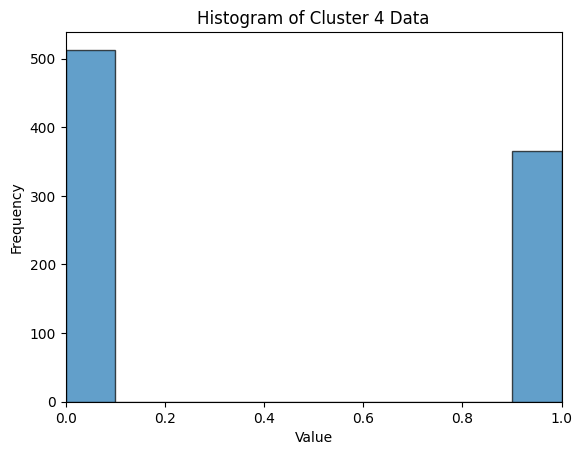

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cluster_4_data = MD_k28["4"]

# Create a histogram
plt.hist(cluster_4_data, bins=np.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.7)

# Set labels for the axes
plt.xlabel("Value")
plt.ylabel("Frequency")

# Set xlim to 0:1
plt.xlim(0, 1)

# Add a title
plt.title("Histogram of Cluster 4 Data")

# Show the plot
plt.show()



In [ ]:
!pip install mixmod

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils import check_random_state

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform Flexmix clustering using Gaussian Mixture Model
def flexmix_clustering(data, n_components_range, n_reps=10):
    best_model = None
    best_bic = np.inf

    for n_components in n_components_range:
        for _ in range(n_reps):
            # Fit Gaussian Mixture Model
            model = GaussianMixture(n_components=n_components, random_state=check_random_state(1234))
            model.fit(data)

            # Get BIC score
            bic = model.bic(data)

            # Update best model if BIC is lower
            if bic < best_bic:
                best_bic = bic
                best_model = model

    return best_model

# Perform Flexmix clustering using Gaussian Mixture Model
n_components_range = range(2, 9)
MD_m28 = flexmix_clustering(MD_x, n_components_range, n_reps=10)

# Print or use MD_flexmix_model as needed
print(MD_m28)


GaussianMixture(n_components=8,
                random_state=RandomState(MT19937) at 0x78440B7E8740)


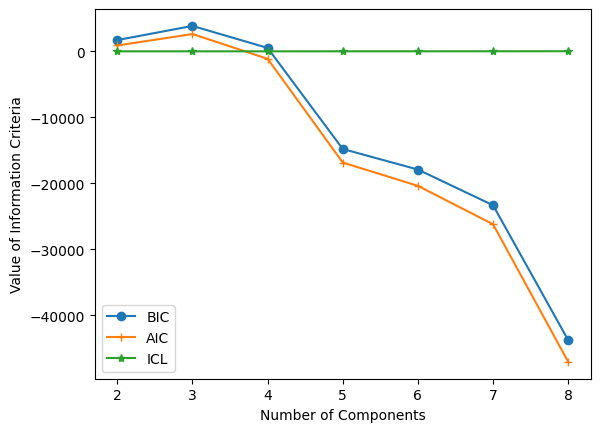

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform Flexmix clustering using Gaussian Mixture Model
def flexmix_clustering(data, n_components_range, n_reps=10):
    bic_values = []
    aic_values = []
    icl_values = []

    for n_components in n_components_range:
        bic_scores = []
        aic_scores = []
        icl_scores = []

        for _ in range(n_reps):
            # Fit Gaussian Mixture Model
            model = GaussianMixture(n_components=n_components, random_state=check_random_state(1234))
            model.fit(data)

            # Get AIC, BIC, and ICL scores
            bic_scores.append(model.bic(data))
            aic_scores.append(model.aic(data))
            icl_scores.append(model.lower_bound_)

        bic_values.append(np.mean(bic_scores))
        aic_values.append(np.mean(aic_scores))
        icl_values.append(np.mean(icl_scores))

    return bic_values, aic_values, icl_values

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform Flexmix clustering using Gaussian Mixture Model
n_components_range = range(2, 9)
bic_values, aic_values, icl_values = flexmix_clustering(MD_x_scaled, n_components_range, n_reps=10)

# Create a plot
plt.plot(n_components_range, bic_values, label='BIC', marker='o')
plt.plot(n_components_range, aic_values, label='AIC', marker='+')
plt.plot(n_components_range, icl_values, label='ICL', marker='*')

# Set labels for the axes
plt.xlabel("Number of Components")
plt.ylabel("Value of Information Criteria")

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import pairwise_distances_argmin_min

# Set seed for reproducibility
np.random.seed(1234)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Fit KMeans clustering
n_clusters_kmeans = 4  # Use the same number of clusters as in R
kmeans_model = KMeans(n_clusters=n_clusters_kmeans, random_state=check_random_state(1234))
kmeans_labels = kmeans_model.fit_predict(MD_x_scaled)

# Fit Gaussian Mixture Model
n_components_gmm = 4  # Use the same number of components as in R
gmm_model = GaussianMixture(n_components=n_components_gmm, random_state=check_random_state(1234))
gmm_labels = gmm_model.fit_predict(MD_x_scaled)

# Get the cluster assignments for cluster "4" in the GMM model
cluster_4_indices = np.where(gmm_labels == 3)[0]

# Create a contingency table
contingency_table = np.zeros((n_clusters_kmeans, n_components_gmm), dtype=int)
for kmeans_cluster in range(n_clusters_kmeans):
    indices = np.where(kmeans_labels == kmeans_cluster)[0]
    common_indices = np.intersect1d(indices, cluster_4_indices)
    contingency_table[kmeans_cluster, 3] = len(common_indices)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Contingency Table:
[[  0   0   0 340]
 [  0   0   0  61]
 [  0   0   0  38]
 [  0   0   0   0]]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.mixture import GaussianMixture

# Set seed for reproducibility
np.random.seed(1234)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Fit KMeans clustering
n_clusters_kmeans = 4  # Use the same number of clusters as in R
kmeans_model = KMeans(n_clusters=n_clusters_kmeans, random_state=check_random_state(1234))
kmeans_labels = kmeans_model.fit_predict(MD_x_scaled)

# Fit Gaussian Mixture Model for Flexmix clustering
n_components_flexmix = 4  # Use the same number of components as in R
flexmix_model = GaussianMixture(n_components=n_components_flexmix, random_state=check_random_state(1234))
flexmix_labels = flexmix_model.fit_predict(MD_x_scaled)

# Create a contingency table
MD_m4a = np.zeros((n_clusters_kmeans, n_components_flexmix), dtype=int)
for kmeans_cluster in range(n_clusters_kmeans):
    indices = np.where(kmeans_labels == kmeans_cluster)[0]
    MD_m4a[kmeans_cluster, :] = np.bincount(flexmix_labels[indices], minlength=n_components_flexmix)

# Display the contingency table
print("Contingency Table:")
print(MD_m4a)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Contingency Table:
[[  0  56   2 340]
 [ 10 171 369  61]
 [  5  66 216  38]
 [119   0   0   0]]


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Set seed for reproducibility
np.random.seed(1234)

MD_x_scaled = MD_m4a

# Fit Gaussian Mixture Model for Flexmix clustering
n_components_flexmix = 4  # Use the same number of components as in R
flexmix_model = GaussianMixture(n_components=n_components_flexmix, random_state=check_random_state(1234))
flexmix_model.fit(MD_x_scaled)

# Calculate log-likelihood
log_likelihood = flexmix_model.score(MD_m4a)

# Display the log-likelihood
print("Log-Likelihood:", log_likelihood)


Log-Likelihood: 22.568972621989968


In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [ ]:
import pandas as pd

like_counts = df['Like'].value_counts().sort_index(ascending=False)

# Display the reversed frequency table
print(like_counts)


I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [ ]:
import pandas as pd

# Define a mapping dictionary
mapping = {'I love it!+5': 1, '+4': 2, '+3': 3, '+2': 4, '+1': 5, '0': 6, '-1': 7, '-2': 8, '-3': 9, '-4': 10, 'I hate it!-5': 11}

# Create a new column 'NumericCode' based on the mapping
df['Like.n'] = 6-df['Like'].map(mapping)

like_counts = df['Like.n'].value_counts().sort_index(ascending=False)

# Display the reversed frequency table
print(like_counts)

 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: Like.n, dtype: int64


In [ ]:
!pip install statsmodels

In [ ]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,-5
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,2
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,3
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,4


In [ ]:
df2=df
mapping={'Yes':1,'No':0}
for i in range(11):
  df2[df2.columns[i]]=df2[df2.columns[i]].map(mapping)
df2

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,-3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,4
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,-5
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,4


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Selecting independent variable names
independent_vars = df2.columns[0:11]

# Fit the model
X = sm.add_constant(df2[independent_vars])  # Add a constant term
y = df2['Like.n']
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          4.03e-296
Time:                        14:15:41   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9242      0.280     -6.884      0.0

In [ ]:

# Make predictions using the linear regression model
df2['predicted_like'] = model.predict(sm.add_constant(df2[independent_vars]))

# Apply a threshold to create two clusters
threshold = df2['predicted_like'].median()  # Adjust threshold as needed
df2['predicted_cluster'] = (df2['predicted_like'] > threshold).astype(int)

# Print cluster sizes
cluster_sizes = df2['predicted_cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
0    727
1    726
Name: predicted_cluster, dtype: int64


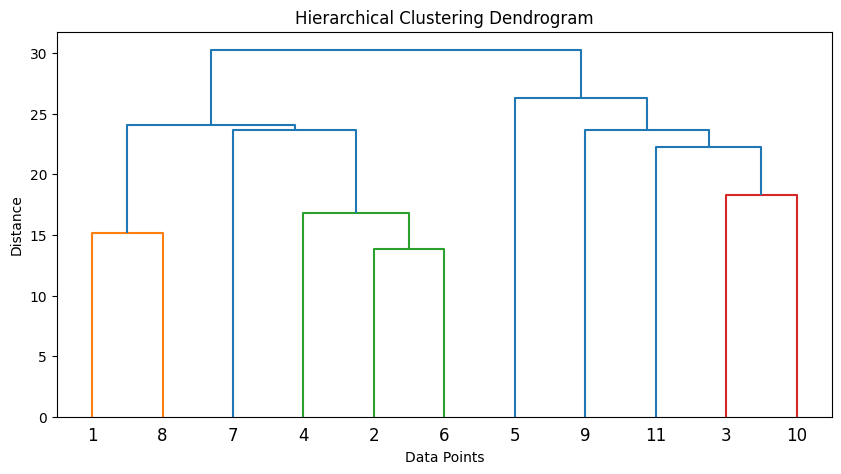

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# Perform hierarchical clustering
MD_hclust = linkage(MD_x.T, method='average')  # Transpose MD_x to match R's dist(t(MD.x))

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(MD_hclust, labels=list(range(1, MD_x.shape[1] + 1)))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


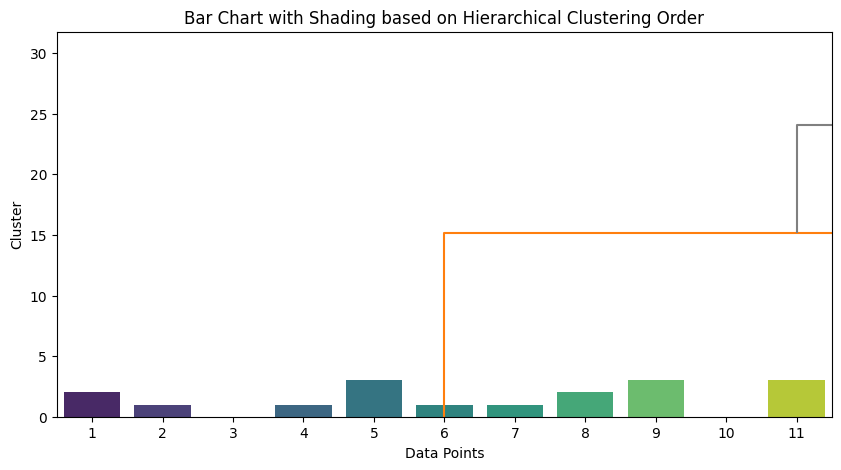

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import seaborn as sns

# Perform hierarchical clustering
MD_vclust = linkage(MD_x.T, method='average')

# Perform KMeans clustering
n_clusters_value = 4
kmeans = KMeans(n_clusters=n_clusters_value, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x.T)

# Plot the bar chart with shading based on hierarchical clustering order
plt.figure(figsize=(10, 5))

# Plot the dendrogram for shading
dendrogram(MD_vclust, orientation='top', no_labels=True, above_threshold_color='gray')

# Plot the bar chart
sns.barplot(x=list(range(1, MD_x.shape[1] + 1)), y=MD_k4, palette='viridis')

plt.title('Bar Chart with Shading based on Hierarchical Clustering Order')
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


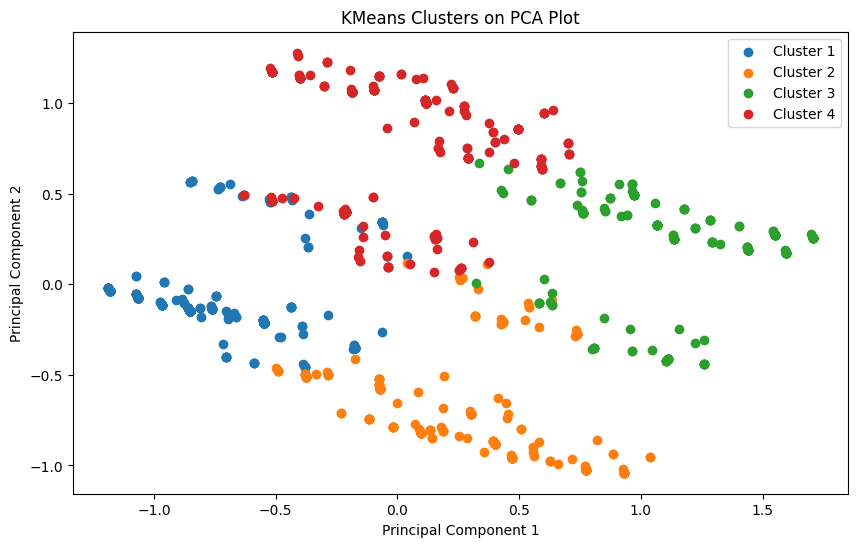

Projection Axes (Principal Components):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Perform KMeans clustering
n_clusters_value = 4  # Adjust based on your requirement
kmeans = KMeans(n_clusters=n_clusters_value, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)

# Plot the KMeans clusters on the PCA plot
plt.figure(figsize=(10, 6))

# Plot the data points
for cluster_id in range(n_clusters_value):
    plt.scatter(MD_pca[MD_k4 == cluster_id, 0], MD_pca[MD_k4 == cluster_id, 1], label=f'Cluster {cluster_id + 1}')

plt.title('KMeans Clusters on PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print projection axes
print("Projection Axes (Principal Components):")
print(pca.components_)


In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Like.n', 'predicted_like',
       'predicted_cluster'],
      dtype='object')

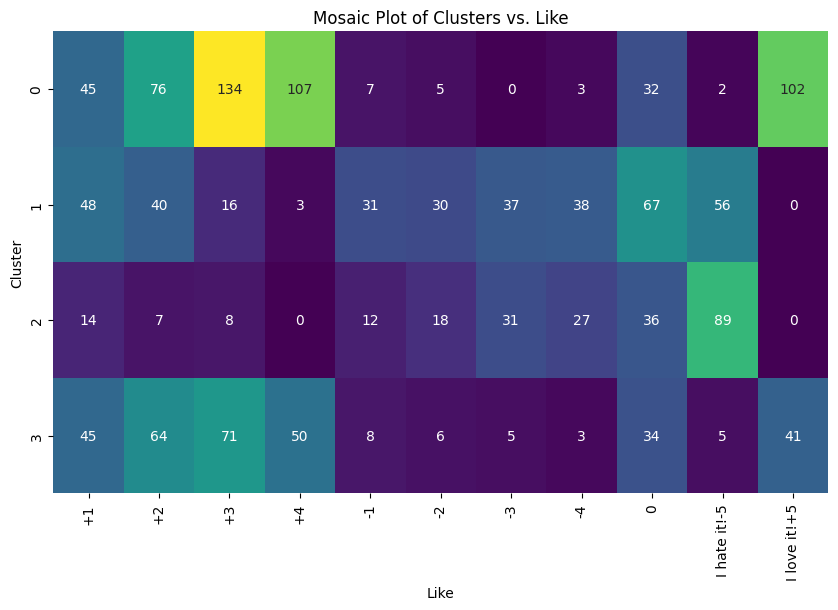

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

like_values = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5']

# Create a DataFrame with the cluster assignments and target variable
df_plot = pd.DataFrame({'Cluster': MD_k4, 'Like': df['Like']})

# Create a contingency table
contingency_table = pd.crosstab(df_plot['Cluster'], df_plot['Like'])

# Plot the mosaic plot
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Mosaic Plot of Clusters vs. Like')
plt.xlabel('Like')
plt.ylabel('Cluster')
plt.show()


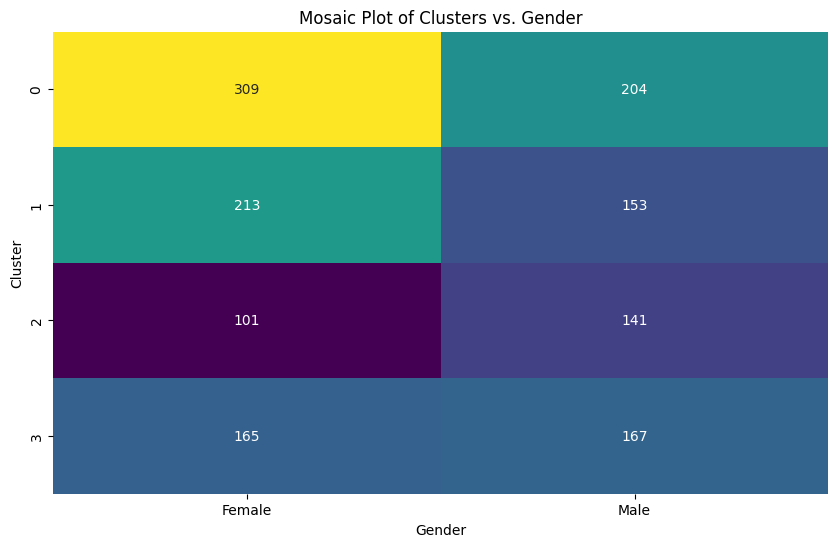

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender_values = ['Male', 'Female']  # Replace with your actual gender values

# Create a DataFrame with the cluster assignments and gender variable
df_plot = pd.DataFrame({'Cluster': MD_k4, 'Gender': df['Gender']})

# Create a contingency table
contingency_table = pd.crosstab(df_plot['Cluster'], df_plot['Gender'])

# Plot the mosaic plot
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Mosaic Plot of Clusters vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.show()

In [ ]:
df3=df2.iloc[:,0:11]
df3['Like']=df2['Like.n']
df3

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like
0,0,1,0,1,0,1,1,0,1,0,0,-3
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4
4,0,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5
1449,1,1,0,1,0,0,1,1,0,1,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,4


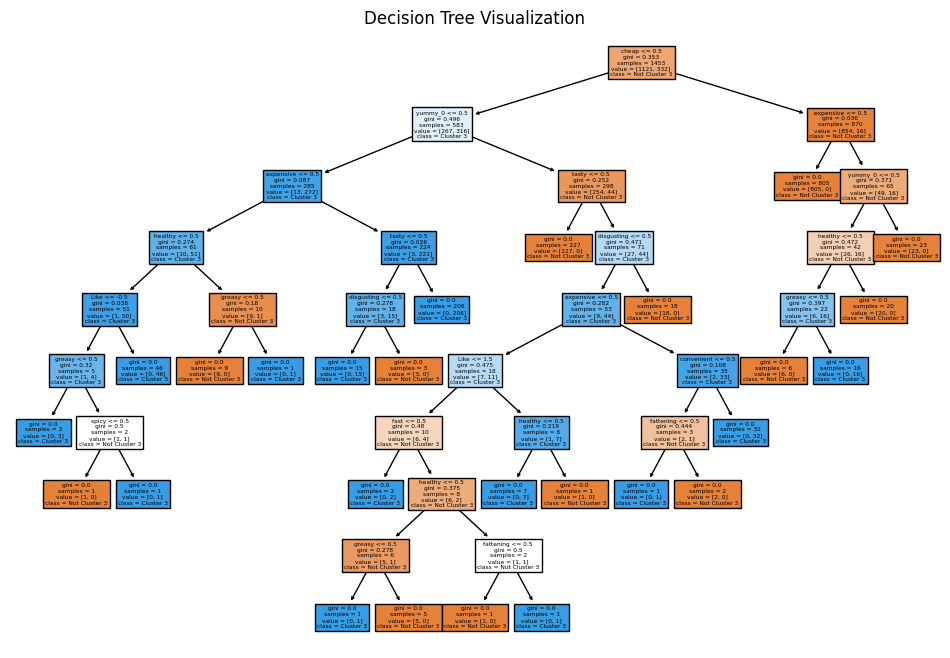

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Convert categorical variables to dummy/indicator variables
mcdonalds_dummies = pd.get_dummies(df3, columns=['yummy'])

# Create the target variable
target_variable = (MD_k4 == 3).astype(int)

# Create a decision tree model
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(mcdonalds_dummies, target_variable)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=mcdonalds_dummies.columns, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()
